In [2]:
import pandas as pd
import glob

data_filepaths = glob.glob('Measurements/*.csv')
measurements_df = pd.concat([pd.read_csv(filepath) for filepath in data_filepaths], ignore_index=True)

measurements_df.head()

,LudCount,ThinkingSecondsPerLud,TotalRuntimeSeconds
0,98,15.575897,1546.848631
1,25,16.576588,420.913698
2,72,12.941793,948.078162
3,69,27.330239,1902.296338
4,66,25.190753,1677.576801


In [32]:
from sklearn.linear_model import LassoCV
import numpy as np

lud_counts = measurements_df['LudCount'].to_numpy()
per_lud_analysis_runtimes = measurements_df['ThinkingSecondsPerLud'].to_numpy()

total_runtimes = measurements_df['TotalRuntimeSeconds'].to_numpy()

features = np.array([
    # lud_counts,
    # per_lud_analysis_runtimes,
    lud_counts * per_lud_analysis_runtimes,
    lud_counts * lud_counts,
    # per_lud_analysis_runtimes * per_lud_analysis_runtimes
])

model = LassoCV(cv=5)
model.fit(features.T, total_runtimes)

predictions = model.predict(features.T)
max_error = np.max(np.abs(predictions - total_runtimes))
print('Max error:', max_error)
print('Model score:', model.score(features.T, total_runtimes))


print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)

Max error: 14.769802309209027
Model score: 0.9999548706260148
Model coefficients: [0.99774234 0.00220892]
Model intercept: 6.125050822335766


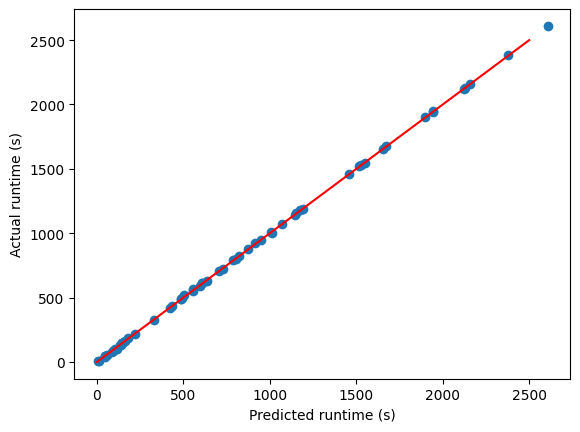

In [30]:
from matplotlib import pyplot as plt

perfect_predictions = np.linspace(0, 2500, 2500)

plt.scatter(predictions, total_runtimes)
plt.plot(perfect_predictions, perfect_predictions, color='red')

plt.xlabel('Predicted runtime (s)')
plt.ylabel('Actual runtime (s)')

plt.show()

Max error: 27.45887799492141
